In [4]:
import sys
import os
module_path = os.path.abspath(os.path.join('../../../src'))
if module_path not in sys.path:
    sys.path.append(module_path)

%config InlineBackend.figure_format = 'retina'

In [5]:
from society.agents import AnalyticalAgent
from society.structure.network import ArtificialNetwork
from society.beliefs import Distribution, BeliefDistribution
from society.structure import AgentNetwork
from updates import Interactions, UpdateRule
from simulation import Simulation, Insights
from plotting.basic import *
from matplotlib import pyplot as plt
from computations.insights.relative import diversity
from plotting.summaries import *
import pandas as pd

In [6]:
linespace = Distribution(type="linespace", range=(-1,1))
unique = Distribution(type="unique", value=0.1)
belief_distribution = BeliefDistribution(unique, linespace)
network = ArtificialNetwork(100, "scale_free", p = 0.01)
agent_network = AgentNetwork(belief_distribution, network, agent_type=AnalyticalAgent)

In [7]:
update_rule = UpdateRule(evaluation_bias=0.3, rewire_probability=1)
interactions = Interactions(update_rule, interacting_agents=True)
insights = Insights()
simulation = Simulation(1000, insights)

In [8]:
densities = [1, 2, 3, 4, 5, 6, 7, 8, 9]
repetitions = 100
results = []
for density in densities:
    for i in range(repetitions):
        network = ArtificialNetwork(100, "scale_free", m = density)
        agent_network = AgentNetwork(belief_distribution, network, agent_type=AnalyticalAgent)
        simulation.run(interactions, agent_network)
        beliefs = simulation.insights.belief_evolution.T[simulation.iterations]
        mean = np.mean(beliefs)
        results.append((diversity(agent_network, mean), density))

Progress: 100%|██████████| 1000/1000 [00:01<00:00, 806.62it/s]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axe

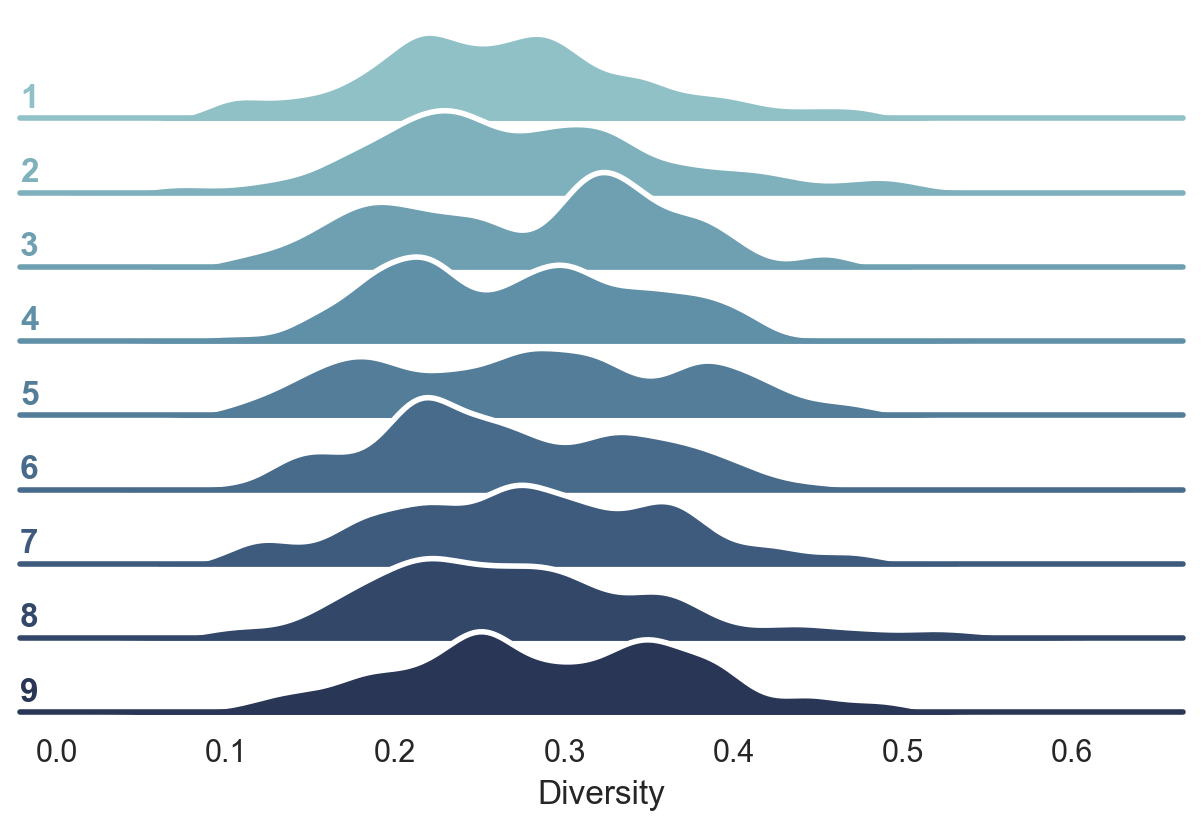

In [10]:
df = pd.DataFrame(results, columns=['Diversity', 'Density'])
diversity_densities(df)